In [13]:
import nbsetup as nb
import copy
import seaborn as sns
import pandas as pd
import itertools
import scipy as sp
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt
from simulations.daisy_world.series import scan

In [31]:
pop3 = {'white': {'albedo': 0.75, 'initial': 0.3}, 'black': {'albedo': 0.25, 'initial': 0.3}}
wv = scan(luminosities=np.linspace(0.48, 1.35, 99), population=pop3, cp=nb.cp)

In [11]:
df = wv.dataframe()

In [14]:
incoherences = copy.deepcopy([series.y[-1] for series in wv.y])

In [15]:
def divergences(pmfs):
    divs = []
    for a,b in itertools.combinations(pmfs, 2):
        p_entropy = ep.pooled_entropy([a,b])
        entropies = ep.ensemble_entropies([a,b])
        div = ep.js_divergence(p_entropy, entropies, None)
        divs.append(div)
    return divs
    

In [16]:
cohs = [divergences(inc.histograms) for inc in incoherences]

In [18]:
data = []
for i, c in enumerate(cohs):
    for k in c:
        data.append({'x': wv.x[i], 'c': k})

data = pd.DataFrame(data)

<AxesSubplot:xlabel='x', ylabel='c'>

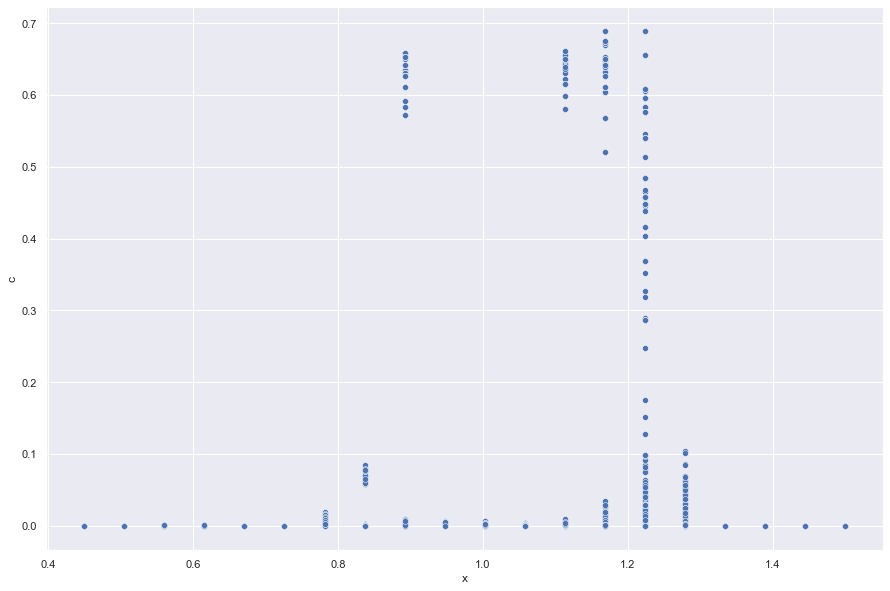

In [19]:
sns.set(rc= {"figure.figsize": (15, 10)})
sns.scatterplot(data=data, x='x', y='c')
sns.lineplot()

In [28]:
def coherences(divs, x, srange=range(4,50)):
    divs = np.array(divs)/np.log(4)
    data = []
    
    for i, row in enumerate(divs):
        dv = ep.density_variance(row)
        for states in srange:
            maxe = np.log(states)
            bins = ep.binspace(0,np.log(4),states)
            hist, _ = np.histogram(row, bins=bins)
            ent = sp.stats.entropy(hist)
            data.append({
                's': states,
                'x': x[i],
                'ent': ent,
                'jayns': ent-maxe,
                'norm': ent/maxe,
                'dv': dv,
            })
    return pd.DataFrame(data)

In [29]:
data = coherences(cohs, wv.x)

<AxesSubplot:xlabel='x', ylabel='jayns'>

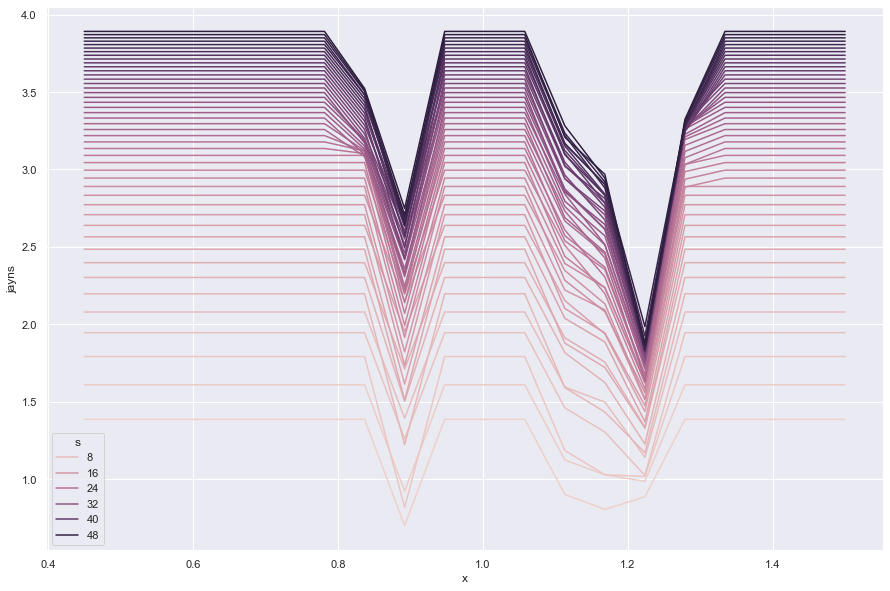

In [23]:
sns.lineplot(data=data, x='x', y='jayns', hue='s')

<AxesSubplot:xlabel='x', ylabel='ent'>

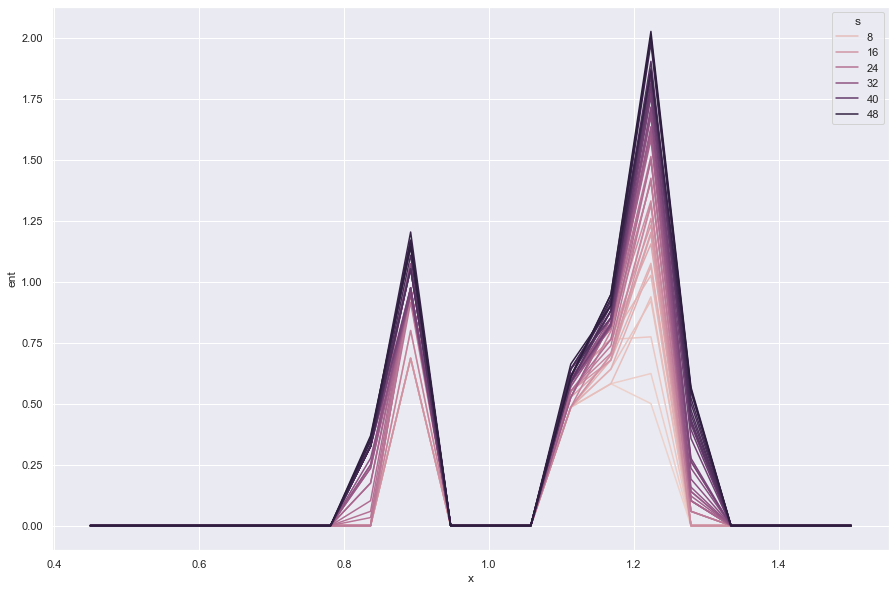

In [24]:
sns.lineplot(data=data, x='x', y='ent', hue='s')

<AxesSubplot:xlabel='x', ylabel='norm'>

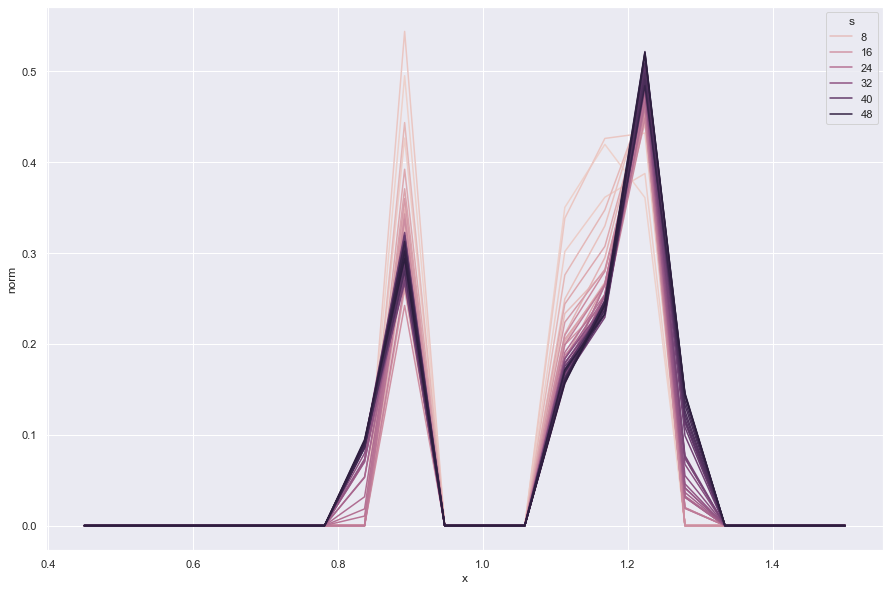

In [25]:
sns.lineplot(data=data, x='x', y='norm', hue='s')

<AxesSubplot:xlabel='x', ylabel='dv'>

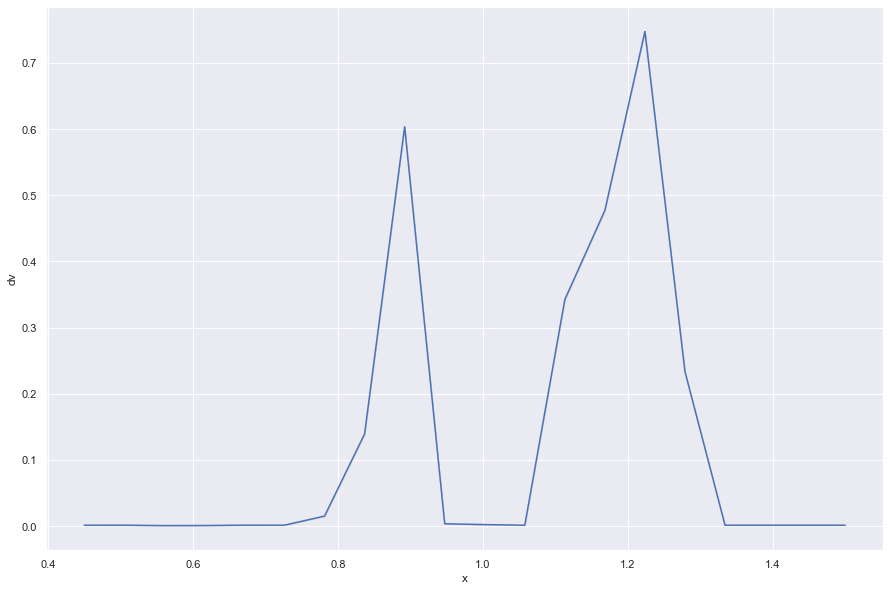

In [30]:
sns.lineplot(data=data, x='x', y='dv')